   Model   aug  Dice Coefficient
0   UNet  0aug             0.636
1  UNet#  0aug             0.741
2   UNet   10x             0.673
3  UNet#   10x             0.640
4   UNet   20x             0.655
5  UNet#   20x             0.702
6   UNet   30x             0.729
7  UNet#   30x             0.741


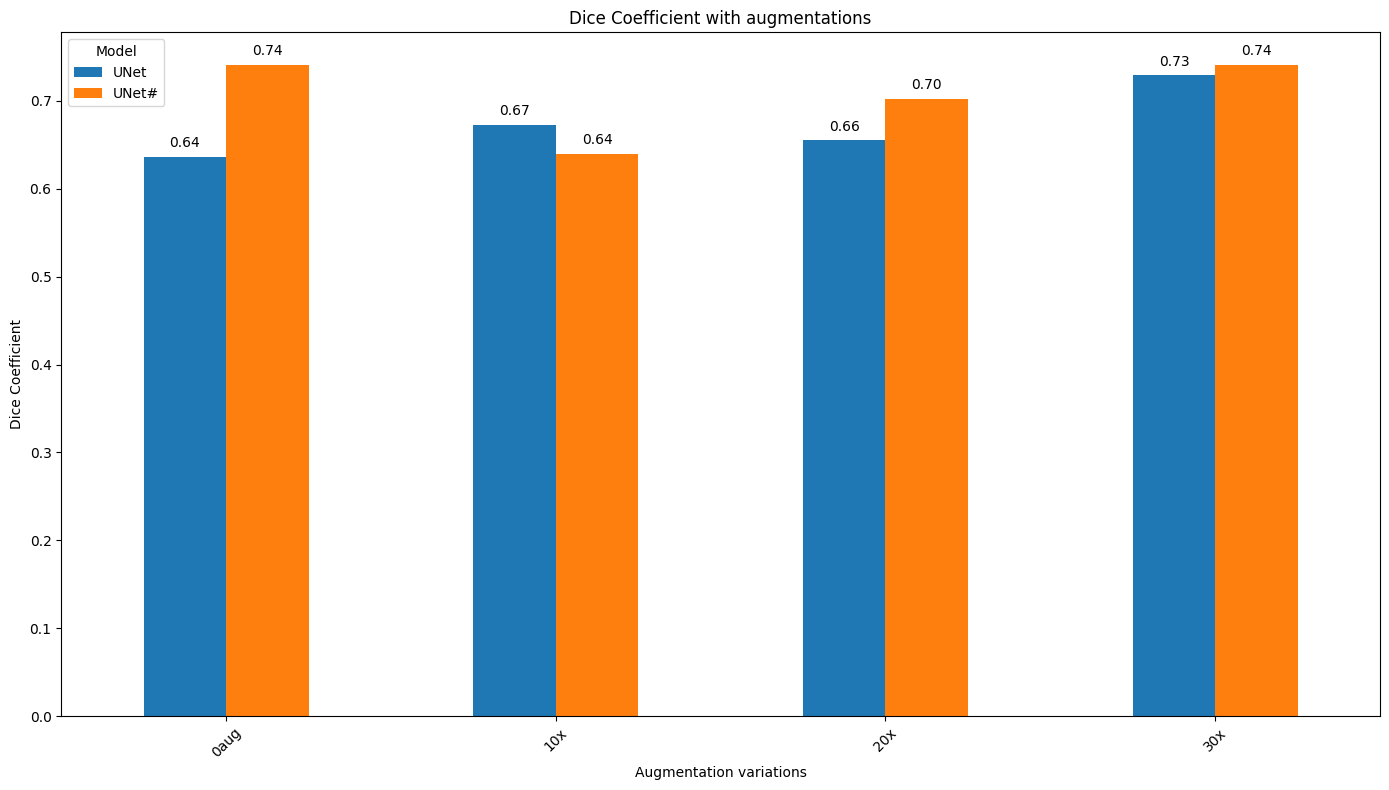

In [21]:
## plot of the dice coeff comparison of UNet and UNet# (fed with feature images)
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

# Revised sample data
# data = {
#     'Model': ['UNet', 'UNet', 'UNet', 'UNet', 'UNet', 'UNet', 'UNet', 'UNet', 'UNet#', 'UNet#', 'UNet#', 'UNet#', 'UNet#', 'UNet#', 'UNet#', 'UNet#'],
#     'n_block': [4, 4, 5, 5, 4, 4, 5, 5, 4, 4, 5, 5, 4, 4, 5, 5],
#     'lr': [0.01, 0.001, 0.01, 0.001, 0.01, 0.001, 0.01, 0.001, 0.01, 0.001, 0.01, 0.001, 0.01, 0.001, 0.01, 0.001],
#     'patience': [20, 20, 20, 20, 50, 50, 50, 50, 20, 20, 20, 20, 50, 50, 50, 50 ],
#     'Dice Coefficient': [0.542, 0.608, 0.638, 0.617, 0.551, 0.609, 0.612, 0.647, 0.682, 0.663, 0.740, 0.711, 0.672, 0.630, 0.540, 0.645]
# }
data = {
    'Model': ['UNet', 'UNet#', 'UNet', 'UNet#', 'UNet', 'UNet#', 'UNet', 'UNet#'],
    'aug': ['0aug', '0aug', '10x', '10x', '20x', '20x', '30x', '30x',],
    'Dice Coefficient': [0.636, 0.741, 0.673, 0.640, 0.655, 0.702, 0.729, 0.741]
}


df = pd.DataFrame(data)

print(df)


# Create a pivot table for better plotting
pivot_df = df.pivot_table(values='Dice Coefficient', index=['aug'], columns='Model')

# Reset the index for plotting
pivot_df = pivot_df.reset_index()

# Plotting grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Creating the plot
pivot_df.set_index(['aug']).plot(kind='bar', ax=ax)

# Add numbers on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customizing the plot
ax.set_title('Dice Coefficient with augmentations')
ax.set_xlabel('Augmentation variations')
ax.set_ylabel('Dice Coefficient')
plt.xticks(rotation=45)
ax.legend(title='Model')

plt.tight_layout()
plt.show()


--------  --------  --------  --------  --------  --------  --------  --------  --------  --------
0.897338  0.813113  0.787967  0.778996  0.760485  0.66516   0.812897  0.717215  0.788233  0.827132
0.80277   0.821968  0.778203  0.728495  0.78448   0.694314  0.747133  0.691526  0.774004  0.729672
0.811591  0.788676  0.776367  0.607268  0.696984  0.575797  0.72823   0.66071   0.755381  0.683572
0.805014  0.814768  0.744041  0.742038  0.660953  0.704606  0.736318  0.739745  0.769424  0.744075
0.746905  0.79227   0.701058  0.728521  0.691898  0.729289  0.746481  0.675109  0.683797  0.663296
0.793915  0.79568   0.738872  0.787276  0.627094  0.692364  0.595425  0.569636  0.639477  0.536229
--------  --------  --------  --------  --------  --------  --------  --------  --------  --------
--------  --------  --------  --------  --------  --------  --------  --------  --------  --------
0.889614  0.923106  0.836588  0.881491  0.675021  0.783599  0.538371  0.696788  0.605247  0.716301
0.897301  

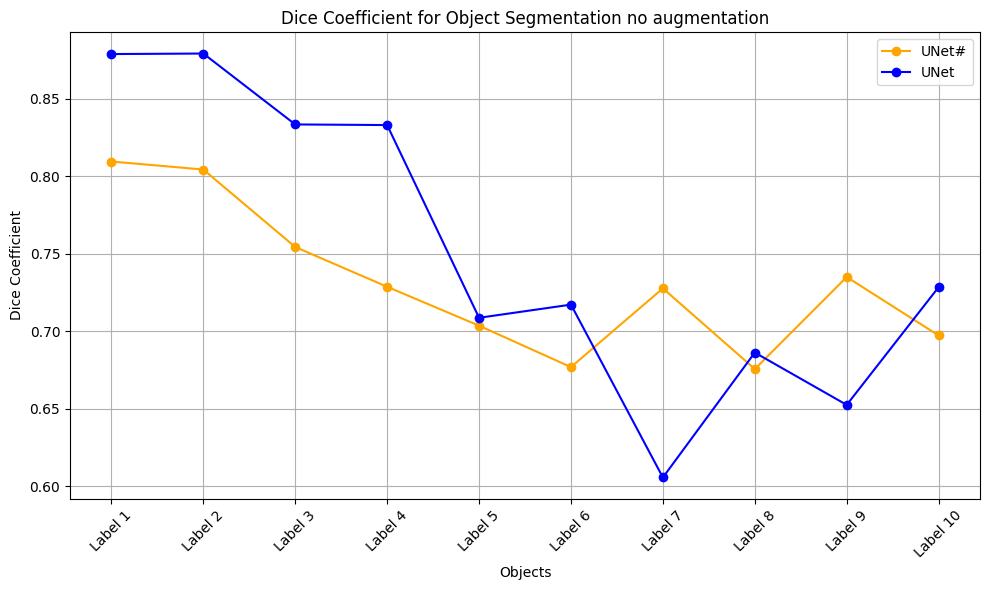

In [3]:
### each label dice comparispon
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import os
import csv
from tabulate import tabulate

all_data = []
# Function to extract numeric part from folder name
def extract_number(folder_name):
    return int(folder_name.split('-')[-1])
# Get a list of folder names sorted by the numeric part
folder_names = sorted([folder_name for folder_name in os.listdir('result_test') if folder_name.startswith('20240715-Conv1x1')], key=extract_number)

# Loop through sorted folder names
for folder_name in folder_names:
    folder_path = os.path.join('result_test', folder_name)
    if os.path.isdir(folder_path):
        # Find CSV file in the folder
        csv_files = [file for file in os.listdir(folder_path) if file.endswith('Dice.csv')]
        if len(csv_files) == 1:
            csv_file_path = os.path.join(folder_path, csv_files[0])
            # Read CSV file
            with open(csv_file_path, 'r') as file:
                reader = csv.reader(file)
                # Extract second number from the array
                for row in reader:
                    all_data.append(row[2:-1])                

all_data = np.array(all_data)
all_data = all_data.astype(float)
half_length = all_data.shape[0] // 2

#print(tabulate(all_data))
print(tabulate(all_data[:half_length]))
print(tabulate(all_data[half_length:]))

first_half_mean = np.mean(all_data[:half_length], axis=0)
second_half_mean = np.mean(all_data[half_length:], axis=0)
mean_all = np.mean(all_data, axis=0) 

unet_sharp = first_half_mean.tolist()
unet = second_half_mean.tolist()

mean_all = mean_all.tolist()

print("UNet# dice:")
print(unet_sharp)
print("UNet dice:")
print(unet)

print("Overall mean:")
print(mean_all)


# Sample data (replace with your actual data)
objects = ['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10']



# Creating a DataFrame
df = pd.DataFrame({
    'Objects': objects,
    'UNet#': unet_sharp,
    'UNet': unet
})

# Plotting
plt.figure(figsize=(10, 6))


plt.plot(df['Objects'], df['UNet#'], marker='o', label='UNet#', color = 'orange')
plt.plot(df['Objects'], df['UNet'], marker='o', label='UNet', color = 'blue')

plt.title('Dice Coefficient for Object Segmentation no augmentation')
plt.xlabel('Objects')
plt.ylabel('Dice Coefficient')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
